Predicting the Likelihood of Dementia in Senior Citizens and Alzheimer's Analysis

In [649]:
# Importing necessary packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acs, confusion_matrix as cm

In [650]:
# Reading the dataset taken to predict dementia and alzheimer's in patient
df = pd.read_excel('oasis_longitudinal.xlsx')

In [651]:
# Displaying the first 5 records of the dataset
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [652]:
# Displaying the number of records and attributes present in the dataset
df.shape

(373, 15)

<AxesSubplot:>

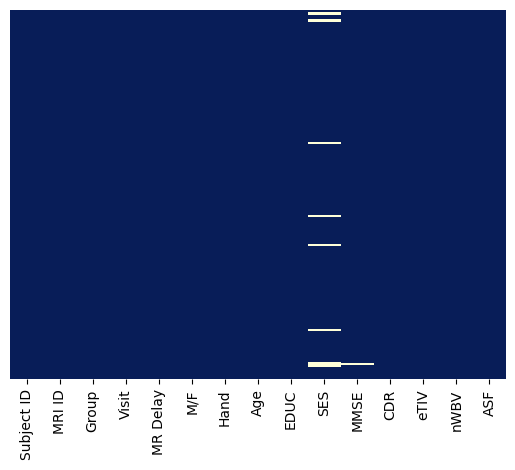

In [653]:
# Visualizing the count of missing values present in the dataset
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = "YlGnBu_r")

In [654]:
# Finding the exact count of missing values present in the dataset
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [655]:
# Creating a dataframe which consists of records having missing values in any of its attributes
df1 = df[df.isna().any(axis = 1)]

In [656]:
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357.330000,0.748085,1.292980
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1364.500000,0.727032,1.286180
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372.115333,0.709954,1.279047
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1429.530000,0.736988,1.227670
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453.050000,0.721043,1.207810
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1474.970000,0.762489,1.189850
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1483.779876,0.750399,1.182790


In [657]:
print("Pearson correlation coefficient for SES and EDUC:", np.corrcoef(df['SES'],df['EDUC'])[0,1])

Pearson correlation coefficient for SES and EDUC: nan


In [658]:
# Creating a dataframe which consists of records which have years of education (i.e. EDUC) = 12
df2 = df[df['EDUC'] == 12]

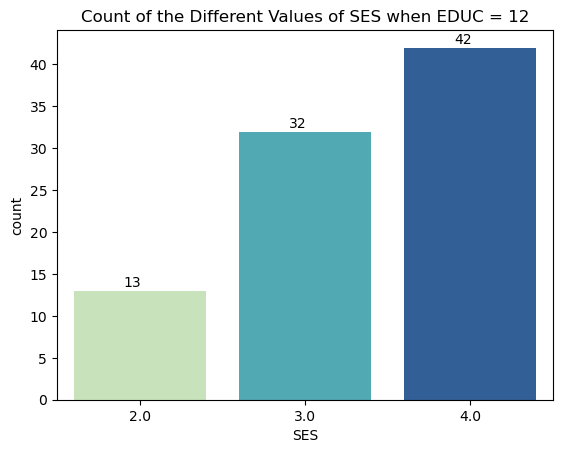

In [659]:
ax = sns.countplot(x = 'SES', data = df2, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES when EDUC = 12')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))
plt.show()

In [660]:
# Creating a dataframe which consists of records which have years of education (i.e. EDUC) = 16
df2 = df[(df['EDUC'] == 16)]

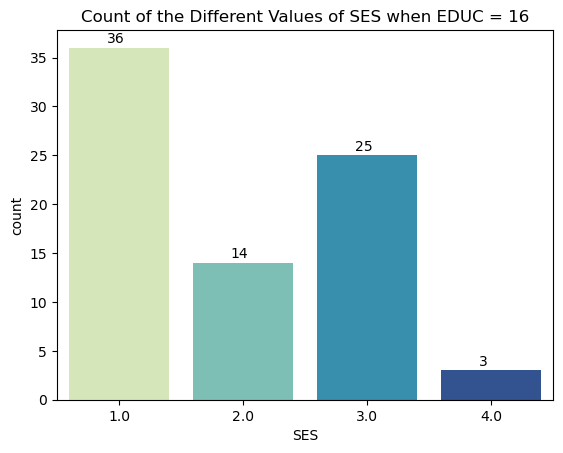

In [661]:
ax = sns.countplot(x = 'SES', data = df2, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES when EDUC = 16')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))
plt.show()

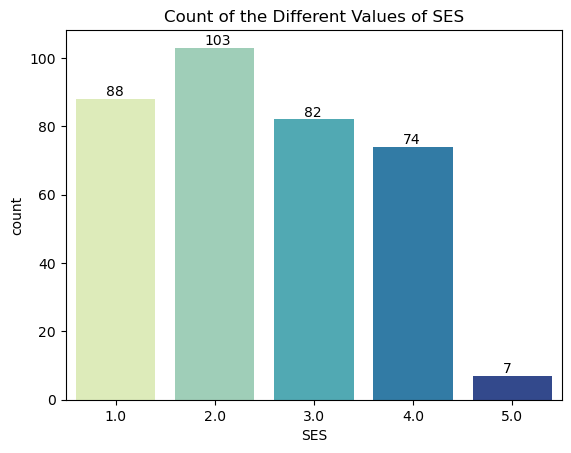

In [662]:
ax = sns.countplot(x = 'SES', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.8))
plt.show()

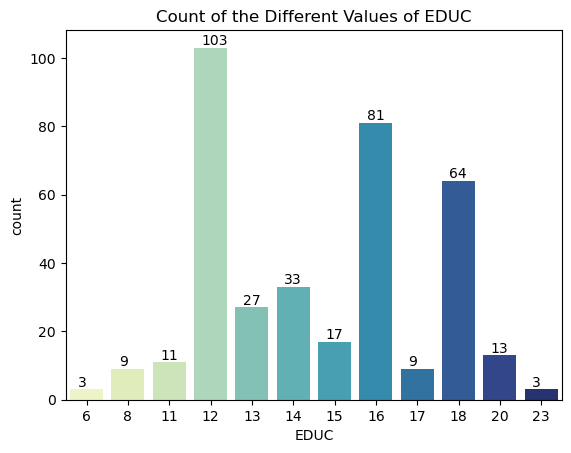

In [663]:
ax = sns.countplot(x = 'EDUC', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of EDUC')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.18, p.get_height() + 0.8))
plt.show()

In [664]:
# Creating a function for imputing the missing SES values
def addSES(cols):
    SES = cols[0]
    EDUC = cols[1]
    if pd.isnull(SES):
      if EDUC == 12:
        x = random.randint(1, 87)
        if x < 43:
          return 4.0 
        elif x < 75:
          return 3.0
        else: 
          return 2.0
      else:  
        x = random.randint(1, 38)
        if x < 25:
          return 3.0
        else:
          return 2.0
    else:
      return SES

In [665]:
# Imputing missing SES values in the dataset
df['SES'] = df[['SES','EDUC']].apply(addSES, axis = 1)

In [666]:
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357.330000,0.748085,1.292980
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1364.500000,0.727032,1.286180
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372.115333,0.709954,1.279047
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1429.530000,0.736988,1.227670
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453.050000,0.721043,1.207810
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1474.970000,0.762489,1.189850
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1483.779876,0.750399,1.182790


In [667]:
# Creating a dataframe which consists of records which have CDR = 1, gender = female, dominant hand = right and years of 
# education (i.e. EDUC) = 12 since these are the common attribute values for the records having missing MMSE values
df3 = df[(df['CDR'] == 1.0) & (df['M/F'] == 'F') & (df['Hand'] == 'R') & (df['EDUC'] == 12)]

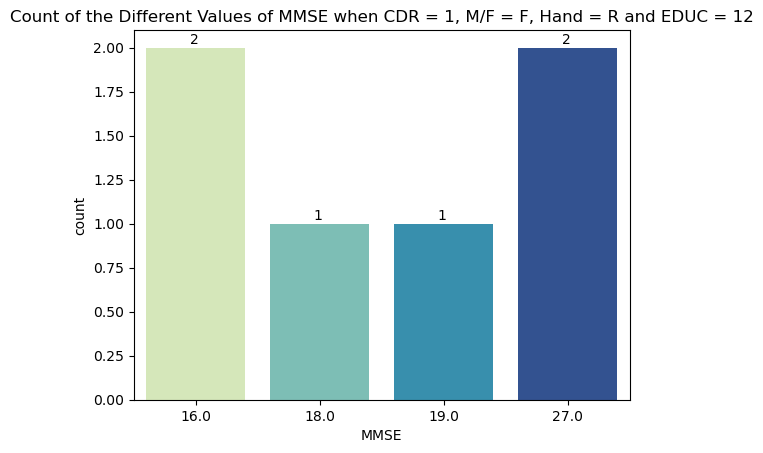

In [668]:
ax = sns.countplot(x = 'MMSE', data = df3, palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE when CDR = 1, M/F = F, Hand = R and EDUC = 12')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 0.02))
plt.show()

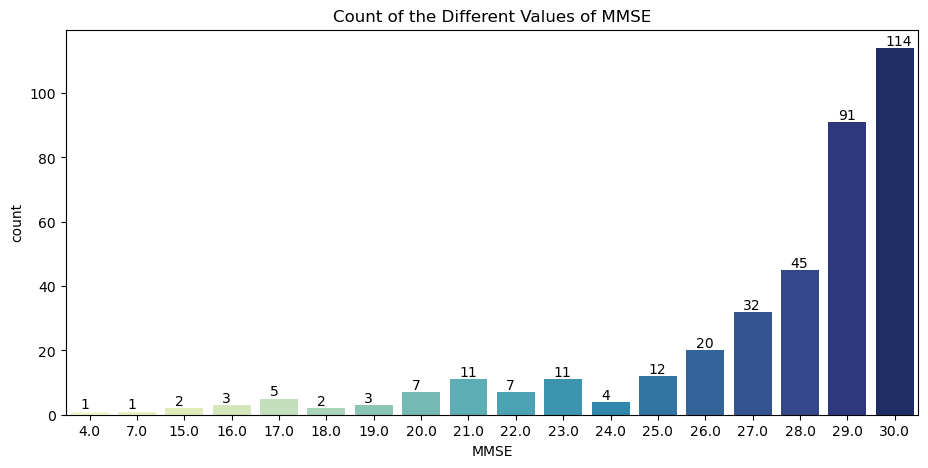

In [669]:
plt.figure(figsize = (11,5))
ax = sns.countplot(x = 'MMSE', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 0.9))
plt.show()

In [670]:
# Creating a function for imputing the missing MMSE values
def addMMSE(cols):
    MMSE = cols[0]    
    if pd.isnull(MMSE):
      y = random.randint(1, 6)
      if y < 3:
        return 16.0
      elif y < 5:
        return 27.0
      elif y == 5:
        return 18.0 
      else:
        return 19.0
    else:
        return MMSE

In [671]:
# Imputing missing MMSE values in the dataset
df['MMSE'] = df[['MMSE']].apply(addMMSE, axis = 1)

In [672]:
# Checking whether imputation has been done properly and no other null values have been missed out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


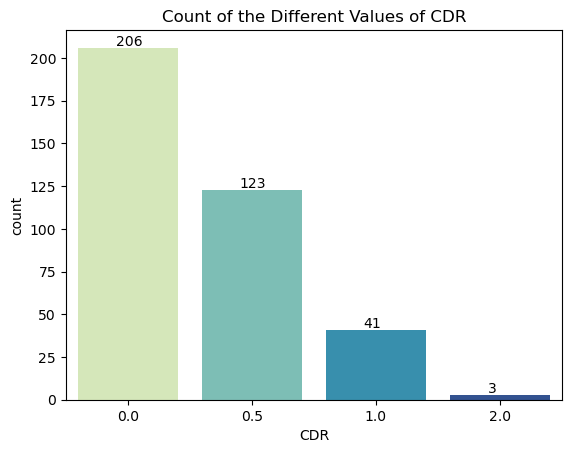

In [673]:
# Clinical Dementia Rating (CDR): 0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD 
# (Source:https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal)
ax = sns.countplot(x = 'CDR', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of CDR')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

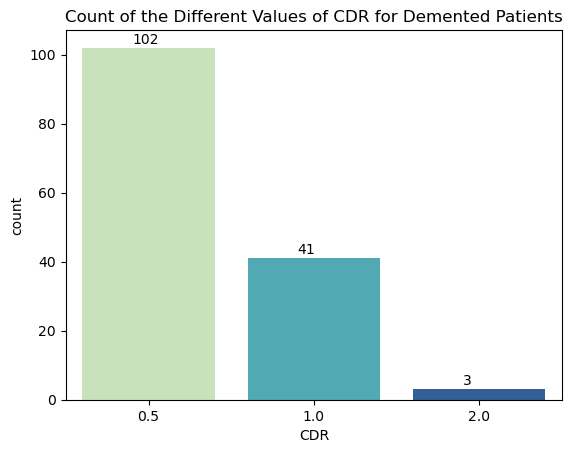

In [674]:
# "Every case of Alzheimer's disease is an example of dementia, but not every type of dementia is Alzheimer's." 
# (Source: https://alzheimer.ca/en/about-dementia/what-alzheimers-disease/difference-between-alzheimers-disease-other-dementias)
ax = sns.countplot(x = 'CDR', data = df[(df['Group'] == 'Demented')], palette = 'YlGnBu')
plt.title('Count of the Different Values of CDR for Demented Patients')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

In [675]:
# Creating a dataframe with only the numerical attributes
num_df = df.select_dtypes(exclude = ['object'])
num_df.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

<AxesSubplot:>

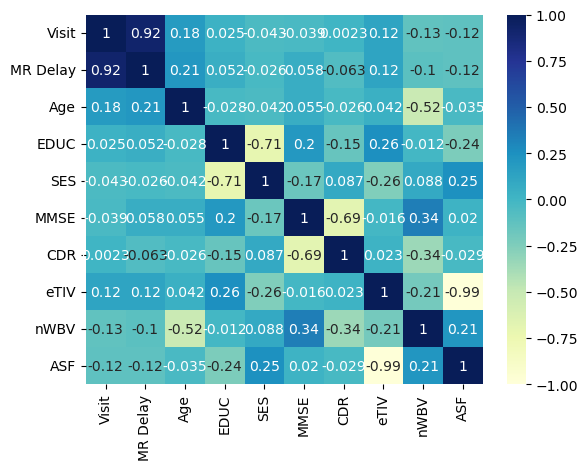

In [676]:
# Finding the correlation between the numerical attributes present in the dataset
sns.heatmap(num_df.corr(), annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

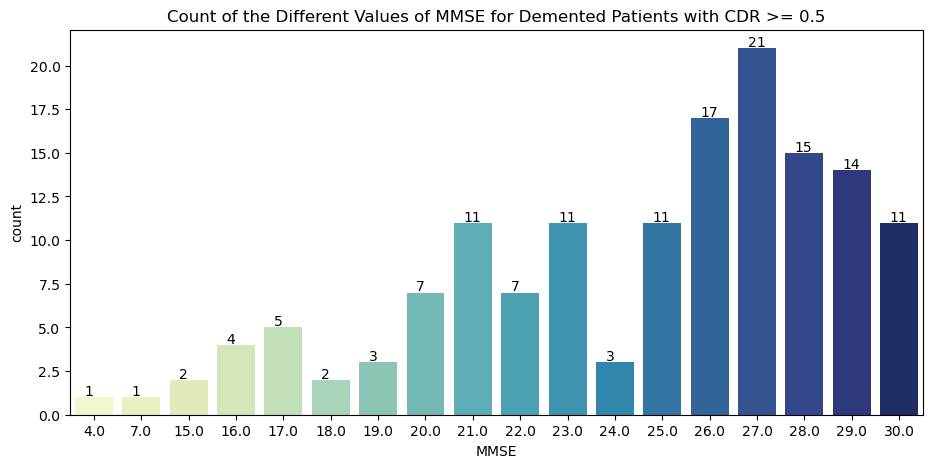

In [677]:
# MMSE values range from 0 = worst to 30 = best
plt.figure(figsize = (11,5))
ax = sns.countplot(x = 'MMSE', data = df[(df['Group'] == 'Demented') & (df['CDR'] >= 0.5)], palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE for Demented Patients with CDR >= 0.5')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 0.1))
plt.show()

In [678]:
# Creating a dataframe with only the categorical attributes
cat_df = df.select_dtypes(include = ['object'])
cat_df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand'], dtype='object')

In [679]:
# Dropping the irrelevant categorical attributes
df = df.drop(['Subject ID', 'MRI ID', 'Hand'], axis = 1)
cat_df = cat_df.drop(['Subject ID', 'MRI ID', 'Hand'], axis = 1)

In [680]:
# Using label encoder to encode Gender
ls = LabelEncoder()
encoded = ls.fit(df['M/F'])
fin_encoded = ls.transform(df['M/F'])
df['M/F'] = fin_encoded
cat_df['M/F'] = fin_encoded

In [681]:
# Using point biserial correlation to find the relationship between CDR and Gender
print(stats.pointbiserialr(cat_df['M/F'], num_df['CDR']))
# Since p-value > 0.05, therefore, the relationship between CDR and Gender is not significant

PointbiserialrResult(correlation=0.20213994473494856, pvalue=8.440795727599894e-05)


In [682]:
# From the above analysis, we can observe that no other attribute is significantly related to CDR in order to help us
# find whether the patient has Alzheimer's Disease. Hence, we can classify whether a person has Alzheimer's
# Disease or not as:

In [683]:
def conditions(cols):
    Group = cols[0]
    CDR = cols[1]
    if Group == 'Demented':
        if CDR == 0.5:
            return 'Very Mild AD'
        elif CDR == 1.0:
            return 'Mild AD'
        else:
            return 'Moderate AD'
    else:
        return 'No AD'

In [684]:
df4 = df.copy()
df4['Alzheimers'] = df4[['Group','CDR']].apply(conditions, axis = 1)

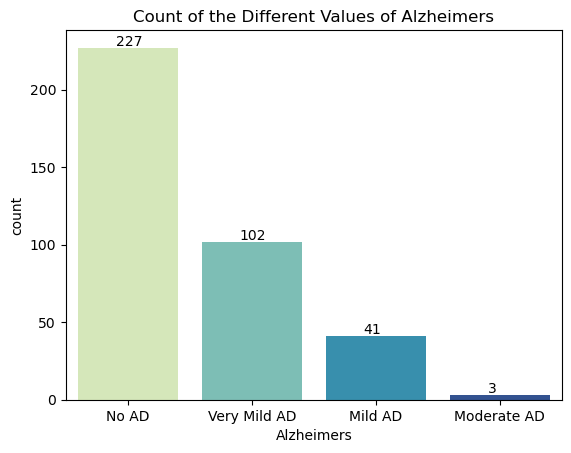

In [685]:
ax = sns.countplot(x = 'Alzheimers', data = df4, palette = 'YlGnBu')
plt.title('Count of the Different Values of Alzheimers')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

In [686]:
# Label Encoding the other categorical variables
encoded = ls.fit(df['Group'])
fin_encoded = ls.transform(df['Group'])
df['Group'] = fin_encoded
cat_df['Group'] = fin_encoded

In [687]:
# Creating function to detect outliers
# Only the attributes which contain multiple outliers are returned by the function
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5

        # Detecting outliers and their indices
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # Storing the indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [688]:
# Calling the above function in order to detect outliers in the dataset
L = detect_outliers(num_df,num_df.columns)
print(L)

[]


In [689]:
# Displaying dataset after missing value imputation, label encoding the categorical attributes and outlier analysis 
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,2,2,457,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,1,1,0,1,75,12,3.0,23.0,0.5,1678.290000,0.736336,1.045710
3,1,2,560,1,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,1,3,1895,1,80,12,3.0,22.0,0.5,1697.911134,0.701236,1.033623
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,1,3,2297,1,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,2,1,0,0,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,2,2,763,0,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [690]:
# Splitting the dataset attributes into target attributes (i.e. y) and predictor attributes (x)
y = df['Group']
X = df.drop(['Group'], axis = 1)

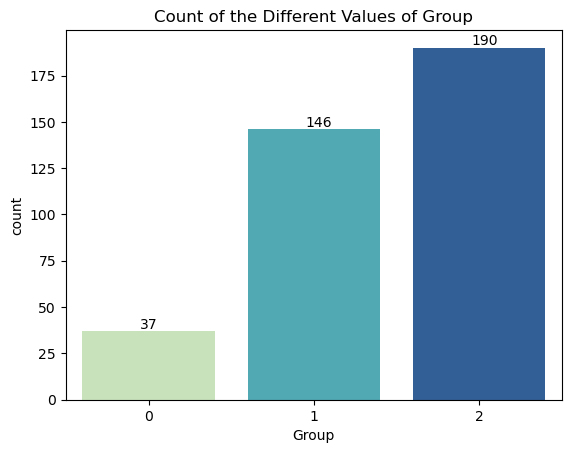

In [691]:
ax = sns.countplot(x = 'Group', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of Group')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1.5))
plt.show()

In [692]:
# Stratified train-test split for predicting dementia (i.e. y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 56, stratify = y)

In [693]:
# Scaling the input/predictor attributes using robust scaler
rs = RobustScaler()
rs.fit(X_train)

X_train = rs.transform(X_train)
X_test = rs.transform(X_test)

In [694]:
# Feature Selection using Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

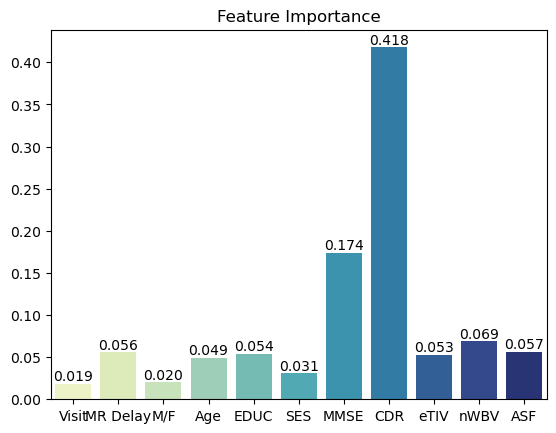

In [695]:
# Visualizing the feature importance scores obtained from 
ax = sns.barplot(x = X.columns, y = rf.feature_importances_, palette = 'YlGnBu')
plt.title('Feature Importance')
ax.bar_label(ax.containers[0], fmt = '%.3f')
plt.show()

In [696]:
# Building the Hard Voting Classifier
vot_hard = VotingClassifier(estimators = estimator, voting = 'hard', n_jobs = -1)

In [697]:
# Creating the list of the estimators/classifiers that are to be used by the voting classifier
estimator = []
estimator.append(('XGB', XGBClassifier()))
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('ETS', ExtraTreesClassifier()))
estimator.append(('NC', NearestCentroid()))
estimator.append(('ET', ExtraTreeClassifier()))
estimator.append(('HGB', HistGradientBoostingClassifier()))
estimator.append(('GNB', GaussianNB()))

In [704]:
# Fitting the model on the various subsets of the input attributes according to their feature importance score in order to 
# find the most optimal subset, i.e., the subset of input attributes which gives the highest accuracy score
indices = np.argsort(rf.feature_importances_)[::-1]
f_indx = []
optimal_score = 0
optimal_indx = 0
for i in indices:
    f_indx.append(i)
    X_train1 = X_train[:,f_indx]
    vot_hard.fit(X_train1, y_train)
    X_test1 = X_test[:,f_indx]
    y_pred = vot_hard.predict(X_test1)
    score = acs(y_test, y_pred)
    if score > optimal_score:
        optimal_score = score
        conf_matrix = cm(y_test, y_pred)
        optimal_indx = i  

In [705]:
optimal_indices = indices[:np.where(indices == optimal_indx)[0][0]]
optimal_features = [i for i in X.columns[optimal_indices]]
print('Optimal subset of input attributes:', optimal_features)

Optimal subset of input attributes: ['CDR', 'MMSE', 'nWBV', 'ASF', 'MR Delay', 'EDUC', 'eTIV', 'Age']


In [706]:
# Evaluation metrics
print('Accuracy Score:', optimal_score)
print('Confusion Matrix:\n',conf_matrix)

Accuracy Score: 0.9574468085106383
Confusion Matrix:
 [[ 5  2  2]
 [ 0 37  0]
 [ 0  0 48]]


In [780]:
# Finding the accuracy of the individual classifiers used as estimators for the voting classifier
classifier = []
accuracy = []
classifier.append("Voting Classifier")
accuracy.append(optimal_score)

In [781]:
classifier.append("XGBoost")
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

In [782]:
classifier.append("Random Forest")
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

In [783]:
classifier.append("Extra Trees")
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

In [784]:
classifier.append("Nearest Centroid")
model = NearestCentroid()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

In [785]:
classifier.append("Extra Tree")
model = ExtraTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

In [786]:
classifier.append("HistGradientBoost")
model = HistGradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

In [787]:
classifier.append("GaussianNB")
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy.append(acs(y_test,y_pred))

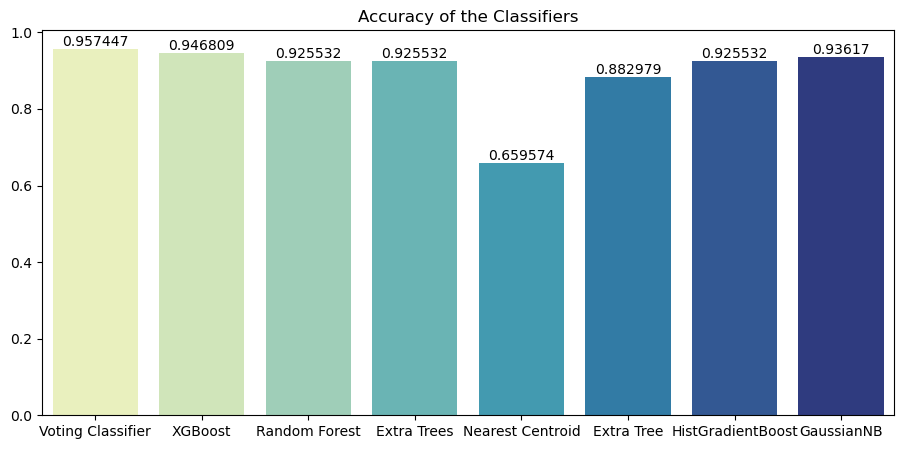

In [788]:
plt.figure(figsize = (11,5))
ax = sns.barplot(x = classifier, y = accuracy, palette = 'YlGnBu')
plt.title('Accuracy of the Classifiers')
ax.bar_label(ax.containers[0])
plt.show()